# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.426014e+01     1.649873e+01
 * time: 0.004539966583251953
     1     6.321671e+01     1.218803e+01
 * time: 0.013283014297485352
     2     5.683644e+01     1.520440e+01
 * time: 0.03359508514404297
     3     4.071790e+01     1.010511e+01
 * time: 0.06078386306762695
     4     2.929989e+01     7.744274e+00
 * time: 0.08725190162658691
     5     2.034060e+01     5.364114e+00
 * time: 0.10934090614318848
     6     1.421214e+01     4.677508e+00
 * time: 0.12828707695007324
     7     1.024177e+01     5.544752e+00
 * time: 0.1434319019317627
     8     8.786246e+00     3.088307e+00
 * time: 0.24771785736083984
     9     7.529042e+00     2.546109e+00
 * time: 0.26862096786499023
    10     6.385509e+00     1.944359e+00
 * time: 0.28893399238586426
    11     6.269259e+00     2.676026e+00
 * time: 0.30464601516723633
    12     6.163630e+00     2.300598e+00
 * time: 0.3200969696044922
    13     6.143605e+00     1.429367e+00
 * time:

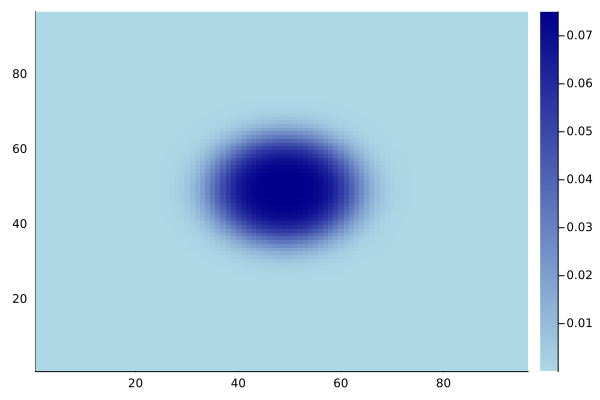

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)